In [13]:
%pylab inline
%config InlineBackend.figure_format = 'retina'
# From Will M. Farr

Populating the interactive namespace from numpy and matplotlib


In [3]:
import pystan
import seaborn as sns

sns.set_context('notebook')
sns.set_style('ticks')
sns.set_palette('colorblind')

In [4]:
model = pystan.StanModel(file='hier.stan')

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_ee796fcea3f97d06ab332f5a2698e482 NOW.


In [5]:
mu_true = randn()
sigma_true = abs(randn())

Nobs = 1000
sigma_obs = 100*sigma_true*ones(Nobs)
Mtrues = mu_true + sigma_true*randn(Nobs)
Mobs = Mtrues + sigma_obs*randn(Nobs)

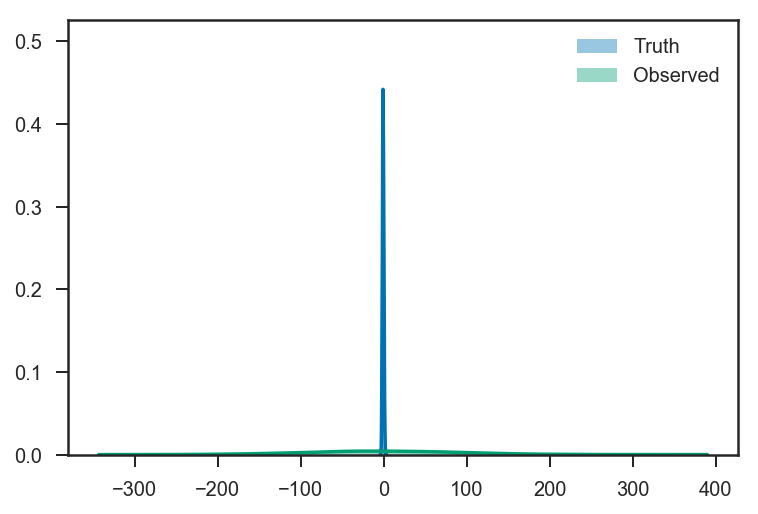

In [6]:
sns.distplot(Mtrues, label='Truth')
sns.distplot(Mobs, label='Observed')
legend(loc='best')

In [7]:
print('limiting scale is {:.2f}'.format(sqrt(1/np.sum(1/sigma_obs**2))))
print('sigma_true is {:.2f}'.format(sigma_true))

limiting scale is 2.88
sigma_true is 0.91


In [8]:
data = {
    'N': Nobs,
    'Mobs': Mobs,
    'sigma_obs': sigma_obs
}

In [10]:
fit = model.sampling(data=data, iter=2000, thin=1, pars=['mu', 'sigma'])

/usr/local/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [11]:
fit

Inference for Stan model: anon_model_ee796fcea3f97d06ab332f5a2698e482.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

        mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu     -0.65    0.04   2.76  -6.04  -2.49  -0.66   1.18   4.81   4000    1.0
sigma   2.06    0.13    3.1   0.03   0.39   0.96   2.22  11.83    535   1.01
lp__   -1004    0.57  22.61  -1048  -1019  -1003 -988.3 -960.3   1587    1.0

Samples were drawn using NUTS at Fri Feb 16 08:13:14 2018.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).

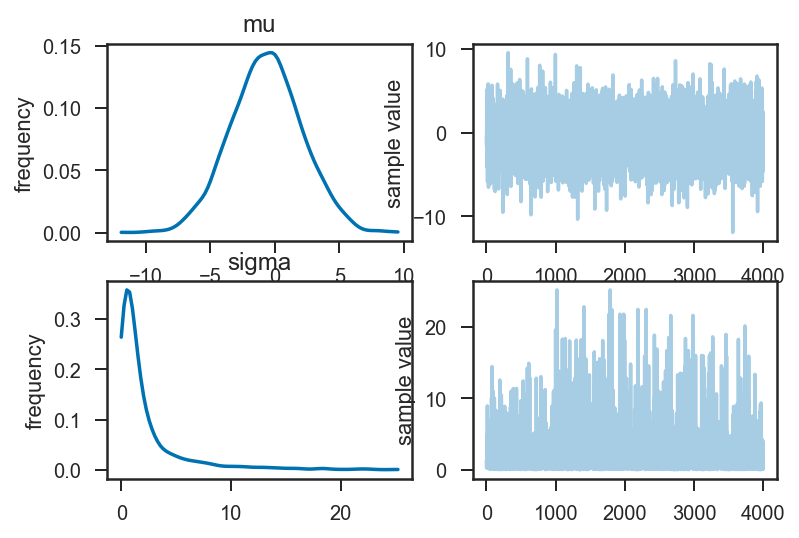

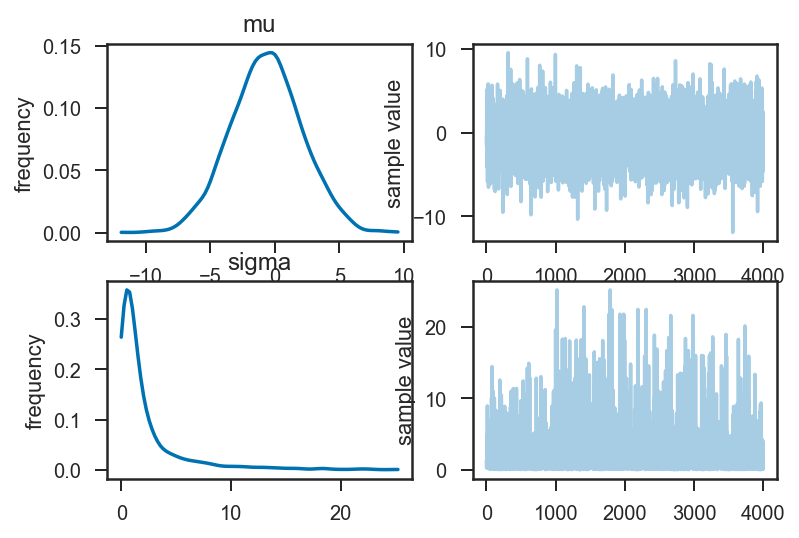

In [12]:
fit.plot()

In [ ]:
chain = fit.extract(permuted=True)

In [ ]:
sns.distplot(chain['sigma'])
axvline(sigma_true)